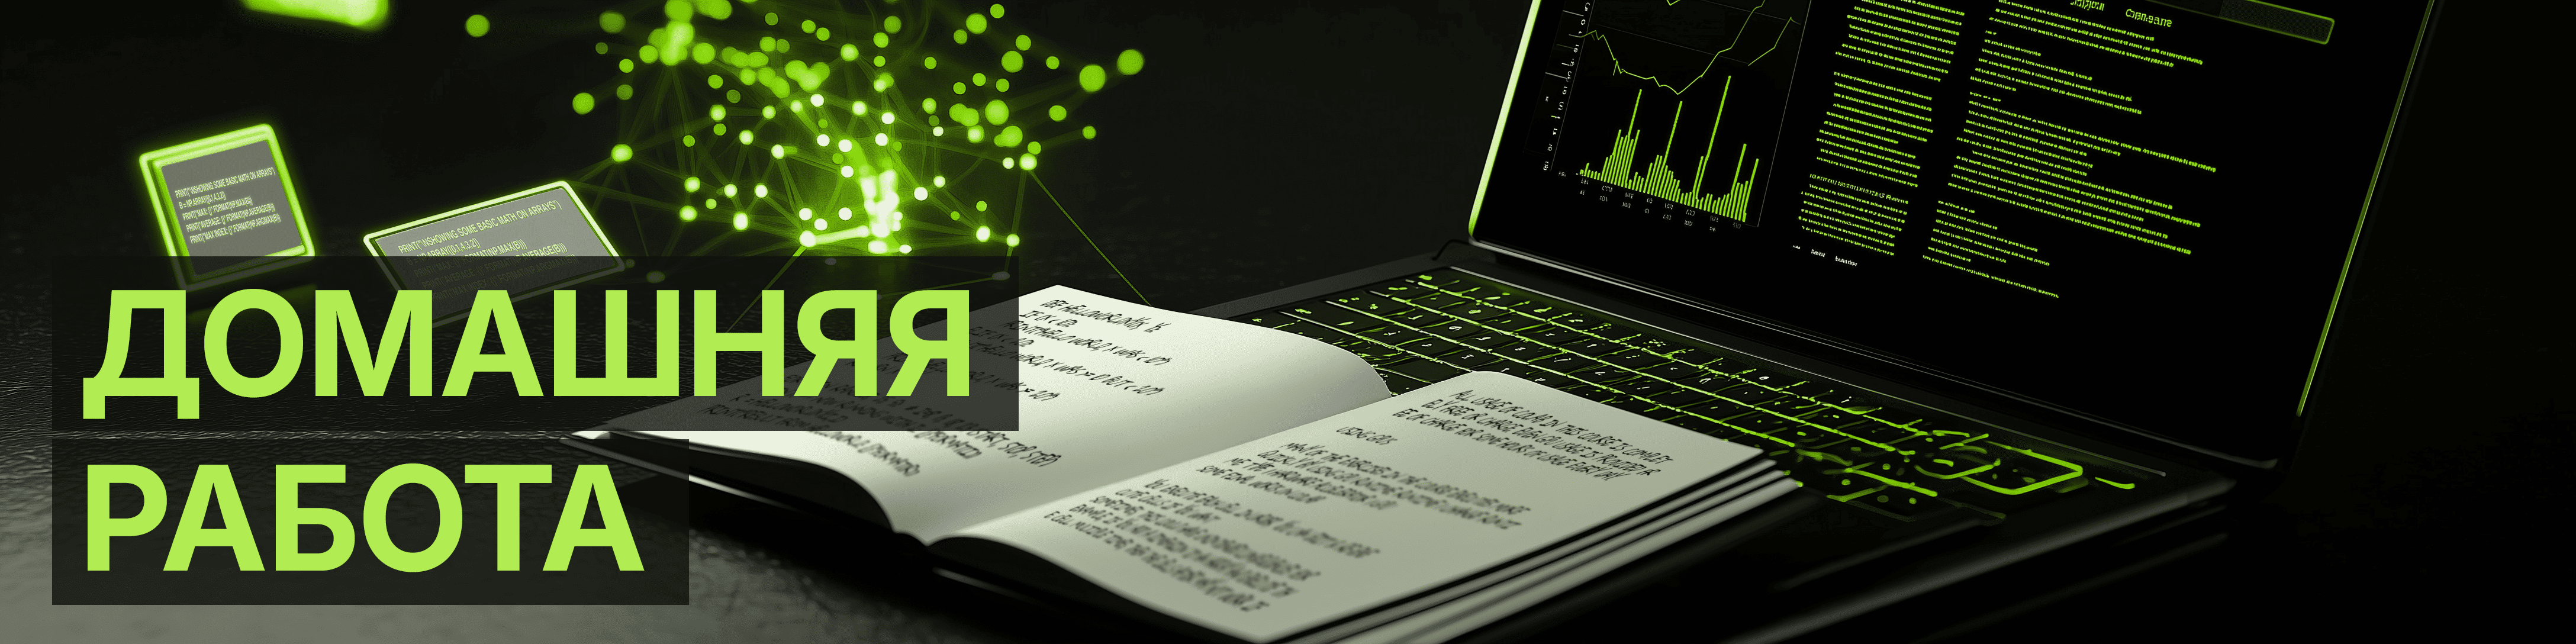

**Навигация по уроку**
1. [Математические основы RL. Динамическое программирование](https://colab.research.google.com/drive/1SQs3UeBr8UyQNq2VUVM_CERv45yP-jeE)
2. [Применение динамического программирования. Задача о замерзшем озере](https://colab.research.google.com/drive/1jQUWuz9ovuQQqWitvzNJswsZjDNfiRiu)
3. [Оценивание стратегии методом Монте-Карло. Играем в блэкджек](https://colab.research.google.com/drive/1pkYY3kJzr71Yr7WD6uEt9XwTsx1pQ0Er)
4. [Разработка управления методом Монте-Карло. Играем в блэкджек](https://colab.research.google.com/drive/1-6W54IJ1RXLcZ4g2Z60OfnJu0GuWGQm3)
5. Домашняя работа

В домашней работе вам необходимо выполнить одно из трёх заданий на выбор:

**Задание 1. На 3 балла:**

1. **Реализация простого эпизода:**
   - Примените любой из алгоритмов Монте-Карло для среды `Taxi` из библиотеки OpenAI Gym.
   - Запустите несколько эпизодов игры и выведите результаты (состояния, действия, вознаграждения).

2. **Анализ результатов:**
   - Проанализируйте результаты выполнения эпизодов. Какие действия чаще всего приводят к успеху (достижению цели)?
   - Попробуйте изменить поведенческую стратегию, чтобы таксист чаще выбирал действия, которые приводят к успеху.

**Задание 2. На 4 балла:**

1. **Реализация ε-жадной стратегии:**
   - Реализуйте ε-жадную стратегию для выбора действий в среде `MountainCar` из библиотеки OpenAI Gym.
   - Используйте функцию `run_episode` с ε-жадной стратегией для выполнения эпизодов.

2. **Обучение с использованием метода Монте-Карло:**
   - Реализуйте алгоритм управления МК с ε-жадной стратегией для обучения агента в среде `MountainCar`.
   - Запустите обучение на 10 000 эпизодов и выведите оптимальную Q-функцию и стратегию.

3. **Анализ результатов:**
   - Проанализируйте, как изменяется Q-функция и стратегия в процессе обучения.
   - Сравните результаты с использованием ε-жадной стратегии и без нее. Как ε-жадная стратегия влияет на обучение?

**Задание 3. На 5 баллов:**

1. **Реализация разделенной стратегии:**
   - Реализуйте алгоритм управления МК с разделенной стратегией для среды `Acrobot` из библиотеки OpenAI Gym.
   - Используйте случайную поведенческую стратегию для сбора данных и обучения целевой стратегии.

2. **Оптимизация параметров:**
   - Проведите эксперименты с различными значениями параметров (например, коэффициент обесценивания `gamma`, количество эпизодов `n_episode`, ε для ε-жадной стратегии).
   - Определите оптимальные значения параметров, которые приводят к наилучшим результатам в обучении.

3. **Сравнение стратегий:**
   - Сравните оптимальную стратегию, полученную с использованием разделенной стратегии, с оптимальной стратегией, полученной с использованием ε-жадной стратегии.
   - Проанализируйте, какая стратегия дает лучшие результаты в среде `Acrobot`.

4. **Визуализация результатов:**
   - Визуализируйте Q-функцию и стратегию для среды `Acrobot`.
   - Используйте библиотеку `matplotlib` для построения графиков и поверхностей, чтобы наглядно представить результаты.

**Дополнительное задание по желанию:**

- Попробуйте применить метод Монте-Карло с разделенной стратегией для среды `LunarLander` из библиотеки OpenAI Gym.
- Проанализируйте, как изменяется Q-функция и стратегия в процессе обучения для новой среды.

**Примечание:**
- Версию среды мы не указываем, определить текущую рабочую версию, вам предстоит самостоятельно.

# Загружаем игру Acrobot

In [1]:
!apt-get install -y xvfb python-opengl ffmpeg > /dev/null 2>&1
!pip install pyvirtualdisplay moviepy > /dev/null 2>&1
!pip install --upgrade pyvirtualdisplay pygame ipykernel > /dev/null 2>&1

In [178]:
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata

import plotly.graph_objects as go
import plotly.express as px

from IPython import display as ipythondisplay
from IPython.display import HTML, display as ipy_display

import gymnasium as gym
from gymnasium.wrappers import RecordVideo

from collections import defaultdict

import random
import base64

import torch
import torch.nn as nn
import os
import io
import cv2
import time

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [6]:
import gymnasium as gym
env = gym.make('Acrobot-v1', render_mode="rgb_array")
state, _ = env.reset()

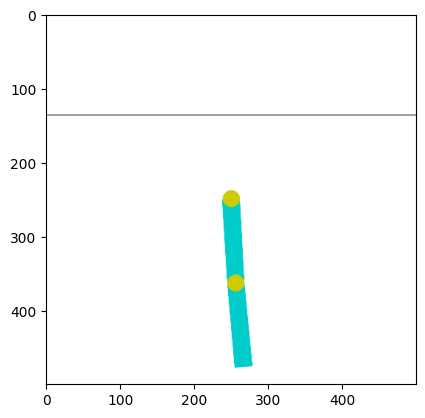

In [7]:
prev_screen = env.render()
plt.imshow(prev_screen)

## Передаваемые параметры среды

In [8]:
print(f'Данные об окружении: {state}')

Данные об окружении: [ 0.9984152   0.0562777   0.999379    0.03523667  0.0041142  -0.05712302]


The observation is a ndarray with shape (6,) that provides information about the two rotational joint angles as well as their angular velocities:

Окружение содержит 6 параметров, которые дают представление об углах вращения сочленений и их скоростях

| Num | Observation               | Min           | Max           |
|-----|---------------------------|---------------|---------------|
| 0   | Cosine of theta1          | -1            | 1             |
| 1   | Sine of theta1            | -1            | 1             |
| 2   | Cosine of theta2          | -1            | 1             |
| 3   | Sine of theta2            | -1            | 1             |
| 4   | Angular velocity of theta1 | ~ -12.567 (-4 * π) | ~ 12.567 (4 * π) |
| 5   | Angular velocity of theta2 | ~ -28.274 (-9 * π) | ~ 28.274 (9 * π) |

где

- theta1 - угол первого сочленения, где угол 0 указывает, что первое звено направлено строго вниз
- theta2 - угол **относительно первого звена**. Угол 0 соответствует одинаковому углу между двумя звеньями

Угловые скорости theta1 и theta2 ограничены значениями ±4π и ±9π рад/с соответственно. Состояние [1, 0, 1, 0, ..., ...] указывает, что оба звена направлены вниз.

## Пространство действий

Действие является дискретным, детерминированным и представляет собой крутящий момент, прикладываемый к управляемому сочленению между двумя звеньями.

| Num | Action                                | Unit         |
|-----|---------------------------------------|--------------|
| 0   | apply -1 torque to the actuated joint | torque (N m) |
| 1   | apply 0 torque to the actuated joint  | torque (N m) |
| 2   | apply 1 torque to the actuated joint  | torque (N m) |

## Награды

Цель задачи - достичь свободным концом маятника заданной целевой высоты за минимальное количество шагов.

- Каждый шаг, на котором цель не достигнута, приносит вознаграждение -1
- Достижение целевой высоты завершает эпизод с вознаграждением 0
- Пороговое значение вознаграждения установлено на уровне -100

Таким образом наша политика ограничена 100 действиями, за которые нужно достигнуть награды 0

## Пример эпизода

![Пример эпизода](https://gymnasium.farama.org/_images/acrobot.gif)

# Рандомный эпизод

In [67]:
# Функция дискретизации состояния
def discretize_state(state, bins=(6, 6, 6, 6, 12, 12)):
    """
    Преобразует непрерывное состояние среды в дискретное (сетка).

    Аргументы:
        state: текущее состояние (np.array)
        bins: количество ячеек по каждой координате состояния

    Возвращает:
        tuple[int] — дискретное состояние, пригодное для Q-таблицы
    """
    # Границы значений Acrobot
    high = np.array([1.0, 1.0, 1.0, 1.0, 4 * np.pi, 9 * np.pi])
    low = -high

    # Преобразование состояния в диапазон [0, 1)
    ratios = (state - low) / (high - low)
    ratios = np.clip(ratios, 0, 0.9999)

    # Дискретизация
    discrete = (ratios * np.array(bins)).astype(int)
    return tuple(discrete)

Таким образом, агент будет считывать нормализованные дискретные состояния в диапазоне 0-1 для углов

In [96]:
def record_game_video(env, video_dir, video_name, Q=None, mode="q_policy", bins=(6, 6, 6, 6, 12, 12)):
    """
    Записывает видео одного оценочного эпизода со стратегией Q или случайной.

    Аргументы:
        env: среда Gym
        video_dir: путь к папке для сохранения видео
        video_name: имя видеофайла (без расширения)
        Q: Q-таблица (dict), если используется Q-политика
        mode: 'q_policy' или 'random'
        bins: схема дискретизации состояний

    Возвращает:
        str: путь к записанному видеофайлу
    """
    os.makedirs(video_dir, exist_ok=True)
    n_action = env.action_space.n

    env_rec = RecordVideo(env, video_folder=video_dir, name_prefix=video_name, episode_trigger=lambda _: True)
    state, _ = env_rec.reset()
    done = False
    truncated = False

    while not (done or truncated):
        if mode == "random" or Q is None:
            # Случайное действие
            action = env_rec.action_space.sample()
        else:
            # Q-политика
            state_disc = discretize_state(state, bins)
            q_values = Q.get(state_disc, np.zeros(n_action))
            action = np.argmax(q_values)

        state, reward, done, truncated, _ = env_rec.step(action)

    env_rec.close()

    # Находим последнее записанное видео
    files = [os.path.join(video_dir, f) for f in os.listdir(video_dir) if f.endswith(".mp4")]
    files.sort(key=lambda x: os.path.getctime(x))
    return files


In [5]:
def show_video(video_path):
    """
    Отображает указанное видео (.mp4).

    @param video_path: полный путь к видеофайлу (из списка, возвращённого record_game_video)
    """
    if not os.path.exists(video_path):
        print(f"Файл не найден: {video_path}")
        return None

    with open(video_path, "rb") as f:
        video_bytes = f.read()
    video_url = f"data:video/mp4;base64,{base64.b64encode(video_bytes).decode()}"

    return HTML(f'''
    <div style="position: relative; padding-bottom: 56.25%; height: 0; overflow: hidden;">
        <video style="position: absolute; top: 0; left: 0; width: 100%; height: 100%;" controls>
            <source src="{video_url}" type="video/mp4">
            Ваш браузер не поддерживает видео тег.
        </video>
    </div>
    ''')

In [99]:
video_dir = 'random_test'
video_name = 'test_run'
test_files = record_game_video(env, video_dir, video_name, mode='random')

In [13]:
print(test_files)

['random_test/test_run-episode-0.mp4']


In [100]:
show_video(test_files[0])

# Находим оптимальную стратегию

In [81]:
# Функция выполнения одного эпизода (ε-жадная стратегия с reward shaping)
def run_episode(env, Q, epsilon, n_action, bins):
    """
    Выполняет один эпизод взаимодействия агента со средой Acrobot-v1
    с использованием ε-жадной стратегии выбора действий и усиленного вознаграждения
    за продвижение маятника вверх (reward shaping).

    Аргументы:
        env: среда OpenAI Gym
        Q: Q-таблица (defaultdict)
        epsilon: вероятность случайного действия (исследование)
        n_action: количество возможных действий
        bins: схема дискретизации состояний

    Возвращает:
        (states, actions, rewards) — списки состояний, действий и вознаграждений за эпизод
    """
    state, _ = env.reset()
    state = discretize_state(state, bins)
    states, actions, rewards = [], [], []

    # Функция вычисления высоты конца маятника
    def get_height(s):
        theta1 = np.arctan2(s[1], s[0])
        theta2 = np.arctan2(s[3], s[2])
        return -np.cos(theta1) - np.cos(theta1 + theta2)

    prev_height = get_height(state)

    while True:
        # ε-жадная стратегия выбора действия
        if state in Q:
            q_values = Q[state]
        else:
            q_values = np.zeros(n_action)

        # Формирование распределения вероятностей действий
        probs = np.ones(n_action) * (epsilon / n_action)
        best_action = np.argmax(q_values)
        probs[best_action] += 1.0 - epsilon

        # Выбор действия с учётом вероятностей
        action = np.random.choice(np.arange(n_action), p=probs)

        states.append(state)
        actions.append(action)

        # Выполнение действия
        next_state, reward, done, truncated, _ = env.step(action)

        # --- Reward shaping: дополнительная награда за движение вверх ---
        next_height = get_height(next_state)
        delta_h = next_height - prev_height
        prev_height = next_height
        reward += 10.0 * delta_h  # коэффициент 5 регулирует силу бонуса
        # ----------------------------------------------------------------

        # Бонус за успешное завершение эпизода
        if done and not truncated:
            reward += 500.0

        rewards.append(reward)

        # Прерывание эпизода при завершении
        if done or truncated:
            break

        # Обновление состояния
        state = discretize_state(next_state, bins)

    return states, actions, rewards


In [84]:
# Управление методом Монте-Карло (MC Control) с ε-жадной стратегией и ε-затуханием
def mc_control_epsilon_greedy(env, gamma=1.0, n_episode=10000, bins=(6, 6, 6, 6, 12, 12)):
    """
    Обучает агента с помощью управления методом Монте-Карло (MC Control)
    с ε-жадной стратегией выбора действий, динамическим уменьшением ε
    (взвешенная стратегия исследования) и учётом дискретизации состояний.

    Алгоритм:
        - выполняет эпизоды взаимодействия со средой
        - вычисляет возвраты (вознаграждение с учётом дисконтирования)
        - обновляет Q(s, a) как среднее всех возвратов для пары (s, a)
        - постепенно снижает ε от 1.0 до ε_min для плавного перехода
          от исследования к эксплуатации

    Аргументы:
        env: среда OpenAI Gym
        gamma: коэффициент дисконтирования награды
        n_episode: количество эпизодов обучения
        bins: схема дискретизации состояний

    Возвращает:
        (Q, policy) — обученная Q-таблица и оптимальная стратегия
    """
    n_action = env.action_space.n
    G_sum = defaultdict(float)     # накопленные возвраты G(s,a)
    N = defaultdict(int)           # количество посещений (s,a)
    Q = defaultdict(lambda: np.zeros(n_action))  # Q-функция
    episode_rewards = []           # Список суммарных наград эпизодов

    # Параметры ε-жадной стратегии с затуханием
    epsilon_start = 0.4
    epsilon_min = 0.1
    epsilon = epsilon_start

    start_time = time.time()  # начало измерения времени

    for episode in range(n_episode):
        # Линейное затухание epsilon
        epsilon = epsilon_start - (epsilon_start - epsilon_min) * (episode / n_episode)
        epsilon = max(epsilon, epsilon_min)

        # Выполнение одного эпизода
        states_t, actions_t, rewards_t = run_episode(env, Q, epsilon, n_action, bins)

        # Суммарная награда за эпизод
        episode_rewards.append(sum(rewards_t))

        G = 0

        # Обратный проход по эпизоду (вычисление возвратов) с every-visit MC
        for s, a, r in zip(reversed(states_t), reversed(actions_t), reversed(rewards_t)):
            G = r + gamma * G
            # Обновление для каждого посещения (every-visit)
            G_sum[(s, a)] += G
            N[(s, a)] += 1
            Q[s][a] = G_sum[(s, a)] / N[(s, a)]


        # Вывод промежуточных результатов каждые 500 эпизодов
        if (episode + 1) % 500 == 0:
            mean_reward = np.mean(episode_rewards[-500:])
            elapsed = time.time() - start_time
            print(f"Эпизод {episode + 1}/{n_episode} завершен за {elapsed:.2f} с. "
                  f"Средняя награда за 500 эпизодов: {mean_reward:.2f}, "
                  f"epsilon={epsilon:.3f}")

    # Формирование оптимальной стратегии: выбор действия с максимальным Q(s,a)
    policy = {s: np.argmax(a_values) for s, a_values in Q.items()}

    return Q, policy


In [71]:
# Оценка обученной стратегии
def evaluate_policy(env, policy, bins=(6, 6, 6, 6, 12, 12), n_episode=100):
    """
    Запускает несколько эпизодов с обученной стратегией и оценивает
    процент успешных попыток.

    Аргументы:
        env: среда OpenAI Gym
        policy: обученная стратегия (dict)
        bins: схема дискретизации состояний
        n_episode: количество эпизодов для оценки
    """
    success = 0
    for _ in range(n_episode):
        state, _ = env.reset()
        state = discretize_state(state, bins)
        total_reward = 0

        for _ in range(500):  # ограничение длины эпизода
            action = policy.get(state, np.random.randint(env.action_space.n))
            next_state, reward, done, truncated, _ = env.step(action)
            total_reward += reward
            state = discretize_state(next_state, bins)

            if done:  # достиг цели
                success += 1
                break
            if truncated:
                break

    print(f"Успешных эпизодов: {success}/{n_episode} ({success/n_episode:.2%})")

# Запускаем поиск

In [86]:
# Параметры обучения
gamma = 1.0      # коэффициент дисконтирования
epsilon = 0.1     # вероятность случайного выбора
n_episode = 50000  # количество эпизодов
#bins=(4, 4, 4, 4, 8, 8)


# Обучение агента методом Монте-Карло с epsilon
Q, policy = mc_control_epsilon_greedy(env, gamma, n_episode)

Эпизод 500/50000 завершен за 52.02 с. Средняя награда за 500 эпизодов: -59.10, epsilon=0.397
Эпизод 1000/50000 завершен за 98.60 с. Средняя награда за 500 эпизодов: 95.61, epsilon=0.394
Эпизод 1500/50000 завершен за 142.64 с. Средняя награда за 500 эпизодов: 136.15, epsilon=0.391
Эпизод 2000/50000 завершен за 182.48 с. Средняя награда за 500 эпизодов: 197.64, epsilon=0.388
Эпизод 2500/50000 завершен за 223.13 с. Средняя награда за 500 эпизодов: 182.70, epsilon=0.385
Эпизод 3000/50000 завершен за 262.68 с. Средняя награда за 500 эпизодов: 198.04, epsilon=0.382
Эпизод 3500/50000 завершен за 303.21 с. Средняя награда за 500 эпизодов: 200.11, epsilon=0.379
Эпизод 4000/50000 завершен за 341.87 с. Средняя награда за 500 эпизодов: 215.08, epsilon=0.376
Эпизод 4500/50000 завершен за 381.05 с. Средняя награда за 500 эпизодов: 214.65, epsilon=0.373
Эпизод 5000/50000 завершен за 419.85 с. Средняя награда за 500 эпизодов: 216.83, epsilon=0.370
Эпизод 5500/50000 завершен за 457.59 с. Средняя наград

Изначально я не вел список наград и эпсилон по эпизодам, чтобы можно было построить график, но из логов можно это сделать даже после обучения.

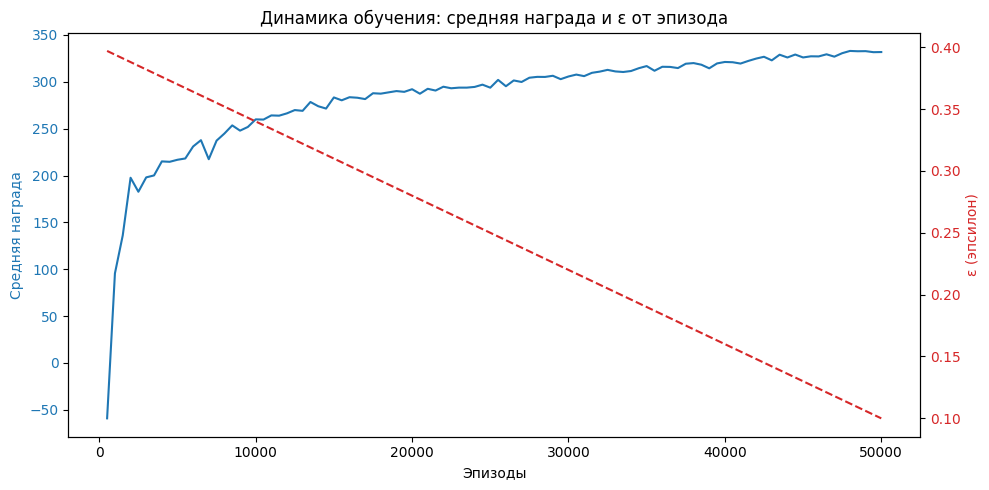

In [204]:
# --- данные из лога ---
episodes = np.arange(500, 50001, 500)

avg_rewards = [
    -59.10, 95.61, 136.15, 197.64, 182.70, 198.04, 200.11, 215.08, 214.65, 216.83,
    218.21, 231.00, 237.74, 217.41, 237.25, 244.81, 253.51, 247.91, 251.84, 259.92,
    259.72, 264.15, 263.88, 266.36, 269.85, 269.04, 278.47, 273.95, 271.46, 283.34,
    280.27, 283.57, 283.02, 281.57, 287.81, 287.37, 288.76, 290.12, 289.30, 292.10,
    287.30, 292.56, 290.68, 294.78, 293.11, 293.80, 293.80, 294.55, 296.98, 293.75,
    302.05, 295.29, 301.46, 299.83, 304.37, 305.28, 305.21, 306.45, 302.83, 305.69,
    307.72, 306.07, 309.60, 310.89, 312.75, 311.09, 310.48, 311.53, 314.54, 316.81,
    311.81, 316.06, 315.90, 314.67, 319.30, 319.99, 318.24, 314.41, 319.63, 321.18,
    320.90, 319.48, 322.30, 324.79, 326.72, 322.91, 328.93, 325.97, 329.11, 326.00,
    327.22, 327.11, 329.36, 326.85, 330.54, 332.95, 332.62, 332.73, 331.62, 331.77
]

epsilons = [
    0.397, 0.394, 0.391, 0.388, 0.385, 0.382, 0.379, 0.376, 0.373, 0.370,
    0.367, 0.364, 0.361, 0.358, 0.355, 0.352, 0.349, 0.346, 0.343, 0.340,
    0.337, 0.334, 0.331, 0.328, 0.325, 0.322, 0.319, 0.316, 0.313, 0.310,
    0.307, 0.304, 0.301, 0.298, 0.295, 0.292, 0.289, 0.286, 0.283, 0.280,
    0.277, 0.274, 0.271, 0.268, 0.265, 0.262, 0.259, 0.256, 0.253, 0.250,
    0.247, 0.244, 0.241, 0.238, 0.235, 0.232, 0.229, 0.226, 0.223, 0.220,
    0.217, 0.214, 0.211, 0.208, 0.205, 0.202, 0.199, 0.196, 0.193, 0.190,
    0.187, 0.184, 0.181, 0.178, 0.175, 0.172, 0.169, 0.166, 0.163, 0.160,
    0.157, 0.154, 0.151, 0.148, 0.145, 0.142, 0.139, 0.136, 0.133, 0.130,
    0.127, 0.124, 0.121, 0.118, 0.115, 0.112, 0.109, 0.106, 0.103, 0.100
]

# --- Построение графика ---
fig, ax1 = plt.subplots(figsize=(10, 5))

# Кривая награды
ax1.plot(episodes, avg_rewards, color='tab:blue', label='Средняя награда')
ax1.set_xlabel('Эпизоды')
ax1.set_ylabel('Средняя награда', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Вторая ось для эпсилон
ax2 = ax1.twinx()
ax2.plot(episodes, epsilons, color='tab:red', linestyle='--', label='ε (эпсилон)')
ax2.set_ylabel('ε (эпсилон)', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Общие настройки
plt.title('Динамика обучения: средняя награда и ε от эпизода')
fig.tight_layout()
plt.show()

In [109]:
def clone_agent(Q, policy):
    """
    версия для numpy arrays
    """
    # Q: создаем через dict comprehension с копированием numpy arrays
    Q_clone = defaultdict(Q.default_factory)
    Q_clone.update({state: q_values.copy() for state, q_values in Q.items()})

    # Policy: простое копирование
    policy_clone = policy.copy()

    return Q_clone, policy_clone

In [110]:
Q_best, policy_best = clone_agent(Q, policy)

In [120]:
print(f'Q-функция: {Q}')
print(f'Политика: {policy}')

Q-функция: defaultdict(<function mc_control_epsilon_greedy.<locals>.<lambda> at 0x7db166b0d300>, {(np.int64(5), np.int64(4), np.int64(4), np.int64(0), np.int64(5), np.int64(6)): array([291.08206177, 318.89199829, 344.18505859]), (np.int64(5), np.int64(4), np.int64(4), np.int64(0), np.int64(6), np.int64(5)): array([302.11038208, 322.18933105, 341.47436523]), (np.int64(5), np.int64(3), np.int64(5), np.int64(1), np.int64(6), np.int64(5)): array([333.05041504, 291.07785034, 249.61264038]), (np.int64(5), np.int64(2), np.int64(5), np.int64(3), np.int64(6), np.int64(5)): array([284.3748782 , 303.79336108, 277.62421213]), (np.int64(5), np.int64(1), np.int64(5), np.int64(4), np.int64(6), np.int64(5)): array([300.40664673, 320.68469238, 263.26763916]), (np.int64(5), np.int64(1), np.int64(4), np.int64(5), np.int64(6), np.int64(5)): array([316.86886597, 340.08053589, 273.02313232]), (np.int64(5), np.int64(1), np.int64(4), np.int64(5), np.int64(5), np.int64(6)): array([286.72583008, 336.91397095, 3

In [88]:
# Оценка обученной стратегии
evaluate_policy(env, policy)

Успешных эпизодов: 100/100 (100.00%)


In [ ]:
video_dir = 'Q_eval'
video_name = 'Q_run'
file_list = record_game_video(env, video_dir, video_name, Q=Q, mode='q_policy')

In [98]:
show_video(file_list[0])

# Визуализация эпсилон тренировки

## преобразование в углы для графиков

In [172]:
def bin_to_value(bin_idx, min_val, max_val, n_bins):
    """Преобразует индекс бина в центр диапазона"""
    bin_idx = np.clip(bin_idx, 0, n_bins - 1)
    step = (max_val - min_val) / n_bins
    return min_val + (bin_idx + 0.5) * step

In [173]:
def from_state_index_to_angles_and_omegas(state_idx, bins, obs_space):
    """
    state_idx: tuple индексов (i0..i5)
    bins: кол-во бинов по каждой оси (6 элементов)
    obs_space: список (min,max) по каждой координате
    """
    vals = []
    for i, (b, (mn, mx)) in zip(state_idx, zip(bins, obs_space)):
        vals.append(bin_to_value(i, mn, mx, b))
    cos1, sin1, cos2, sin2, w1, w2 = vals
    theta1 = np.arctan2(sin1, cos1)
    theta2 = np.arctan2(sin2, cos2)
    return theta1, theta2, w1, w2

In [186]:
# ------------------------------------------------------------
# Построение поверхности Q(θ1, θ2) для каждого действия
# ------------------------------------------------------------
import numpy as np
import plotly.graph_objects as go
from scipy.interpolate import griddata

def plot_Q_surface_per_action_real_angles(Q, bins=(6,6,6,6,12,12)):
    """
    Строит 3D поверхности Q(θ1, θ2) при ω≈0 для каждого действия.
    Q: defaultdict((state_index_tuple)->np.array[n_actions])
    bins: количество бинов по каждому наблюдению
    """

    # --- границы наблюдений (из env.observation_space) ---
    obs_space = [
        (-1, 1),  # cosθ1
        (-1, 1),  # sinθ1
        (-1, 1),  # cosθ2
        (-1, 1),  # sinθ2
        (-12.57, 12.57),  # ω1
        (-28.27, 28.27)   # ω2
    ]

    # --- словарь для подписей действий ---
    action_labels = {
        0: "−1 torque",
        1: "0 torque",
        2: "+1 torque"
    }

    # --- вспомогательная функция для преобразования индексов состояния ---
    def from_state_index_to_angles_and_omegas(s_idx, bins, obs_space):
        vals = []
        for i, (b, (mn, mx)) in zip(s_idx, zip(bins, obs_space)):
            step = (mx - mn) / b
            vals.append(mn + (i + 0.5) * step)

        cos1, sin1, cos2, sin2, w1, w2 = vals
        theta1, theta2 = np.arctan2(sin1, cos1), np.arctan2(sin2, cos2)
        return theta1, theta2, w1, w2

    # --- накапливаем точки ---
    theta1s, theta2s, w1s, w2s, actions, q_values = [], [], [], [], [], []

    for s_idx, q_arr in Q.items():
        theta1, theta2, w1, w2 = from_state_index_to_angles_and_omegas(s_idx, bins, obs_space)
        for a, q in enumerate(q_arr):
            theta1s.append(theta1)
            theta2s.append(theta2)
            w1s.append(w1)
            w2s.append(w2)
            actions.append(a)
            q_values.append(q)

    theta1s, theta2s, w1s, w2s, actions, q_values = map(np.array, (theta1s, theta2s, w1s, w2s, actions, q_values))

    # --- фильтруем состояния с малыми угловыми скоростями ---
    mask = (np.abs(w1s) < 2.0) & (np.abs(w2s) < 4.0)
    theta1s, theta2s, actions, q_values = theta1s[mask], theta2s[mask], actions[mask], q_values[mask]

    # --- создаём сетку для интерполяции ---
    grid_n = 80
    xi = np.linspace(-np.pi, np.pi, grid_n)
    yi = np.linspace(-np.pi, np.pi, grid_n)
    X, Y = np.meshgrid(xi, yi)

    # --- строим поверхности Q(θ₁, θ₂) для каждого действия ---
    for a in np.unique(actions):
        mask_a = (actions == a)
        if np.sum(mask_a) < 10:
            print(f"Недостаточно точек для действия {a}, пропускаем.")
            continue

        Z = griddata((theta1s[mask_a], theta2s[mask_a]),
                     q_values[mask_a],
                     (X, Y),
                     method='linear')

        fig = go.Figure(data=[go.Surface(x=X, y=Y, z=Z, colorscale='Viridis')])
        fig.update_layout(
            title=f"Q(θ₁, θ₂) для действия: {action_labels.get(a, a)}",
            scene=dict(
                xaxis_title="θ₁ (рад)",
                yaxis_title="θ₂ (рад)",
                zaxis_title="Q(s,a)",
            ),
            width=700, height=600
        )
        fig.show()

In [184]:
def plot_policy_heatmap(Q, bins=(6,6,6,6,12,12)):
    """
    Строит тепловую карту политики π(s) = argmax_a Q(s,a)
    и scatter-график реальных состояний в пространстве углов θ₁, θ₂ при малых скоростях.
    """
    # --- границы наблюдений (из env.observation_space) ---
    obs_space = [
        (-1, 1), (-1, 1), (-1, 1), (-1, 1),
        (-12.57, 12.57), (-28.27, 28.27)
    ]

    # --- имена действий ---
    action_labels = {
        0: "−1 torque",
        1: "0 torque",
        2: "+1 torque"
    }

    thetas1, thetas2, w1s, w2s, actions = [], [], [], [], []

    # --- преобразуем Q -> физические значения ---
    for s_idx, q_arr in Q.items():
        vals = []
        for i, (b, (mn, mx)) in zip(s_idx, zip(bins, obs_space)):
            step = (mx - mn) / b
            vals.append(mn + (i + 0.5) * step)

        cos1, sin1, cos2, sin2, w1, w2 = vals
        theta1, theta2 = np.arctan2(sin1, cos1), np.arctan2(sin2, cos2)
        best_a = np.argmax(q_arr)

        thetas1.append(theta1)
        thetas2.append(theta2)
        w1s.append(w1)
        w2s.append(w2)
        actions.append(best_a)

    # --- фильтрация по малым скоростям ---
    thetas1, thetas2, w1s, w2s, actions = map(np.array, (thetas1, thetas2, w1s, w2s, actions))
    mask = (np.abs(w1s) < 2.0) & (np.abs(w2s) < 4.0)
    thetas1, thetas2, actions = thetas1[mask], thetas2[mask], actions[mask]

    # --- создаем сетку для интерполяции ---
    grid_x, grid_y = np.mgrid[-np.pi:np.pi:300j, -np.pi:np.pi:300j]
    grid_actions = griddata(
        (thetas1, thetas2),
        actions,
        (grid_x, grid_y),
        method='nearest'  # для дискретных областей
    )

    # === ТЕПЛОВАЯ КАРТА ПОЛИТИКИ ===
    fig_heatmap = go.Figure(data=go.Heatmap(
        x=np.linspace(-np.pi, np.pi, 300),
        y=np.linspace(-np.pi, np.pi, 300),
        z=grid_actions,
        colorscale=[
            [0.0, "royalblue"],
            [0.5, "limegreen"],
            [1.0, "orangered"]
        ],
        colorbar=dict(
            tickvals=[0, 1, 2],
            ticktext=["−1 torque", "0 torque", "+1 torque"],
            title="Действие"
        )
    ))
    fig_heatmap.update_layout(
        title="Карта политики агента π(s) = argmaxₐ Q(s,a)",
        xaxis_title="θ₁ (рад)",
        yaxis_title="θ₂ (рад)",
        width=700,
        height=600
    )

    # === SCATTER ДЛЯ РЕАЛЬНЫХ ТОЧЕК ===
    action_names = np.vectorize(action_labels.get)(actions)
    fig_scatter = px.scatter(
        x=thetas1, y=thetas2, color=action_names,
        title="Политика агента (реальные состояния)",
        labels={'x': 'θ₁ (рад)', 'y': 'θ₂ (рад)', 'color': 'Действие'}
    )
    fig_scatter.update_traces(marker=dict(size=5, opacity=0.7))
    fig_scatter.update_layout(width=700, height=600)

    # --- вывод ---
    fig_heatmap.show()
    fig_scatter.show()

## Смотрим графики по действиям

In [187]:
plot_Q_surface_per_action_real_angles(Q, bins)

На 3d графиках можно видеть поверхности, отражающие каждый вид действия и ценность их выбора в определенном положении маятника. Например, в большинстве случаев агент выработал тактику толкать маятник в направлении -1, но в каких то крайних положениях наоборот это действие будет оценено низко, тогда как обратный толчок в направлении 1 - высоко

In [185]:
plot_policy_heatmap(Q)

Здесь можно видеть карту политики агента, когда он решает, какое действие выполнить при определенных углах поворота основного маятника и второстепенного относительно главного.

# Раздельная стратегия

In [188]:
# === Выполнение одного эпизода (раздельная стратегия) ===
def run_episode_separated(env, Q, mode, n_action, bins):
    """
    Выполняет один эпизод в режиме:
        - mode = "explore": полностью случайное поведение
        - mode = "exploit": строго по текущей лучшей стратегии Q

    Использует reward shaping для ускорения обучения.
    """
    state, _ = env.reset()
    state = discretize_state(state, bins)
    states, actions, rewards = [], [], []

    # Функция вычисления высоты конца маятника
    def get_height(s):
        theta1 = np.arctan2(s[1], s[0])
        theta2 = np.arctan2(s[3], s[2])
        return -np.cos(theta1) - np.cos(theta1 + theta2)

    prev_height = get_height(state)

    while True:
        if state in Q:
            q_values = Q[state]
        else:
            q_values = np.zeros(n_action)

        # === Раздельная стратегия ===
        if mode == "explore":
            action = np.random.randint(n_action)
        else:  # mode == "exploit"
            action = np.argmax(q_values)

        states.append(state)
        actions.append(action)

        # Выполнение действия
        next_state, reward, done, truncated, _ = env.step(action)

        # --- Reward shaping ---
        next_height = get_height(next_state)
        delta_h = next_height - prev_height
        prev_height = next_height
        reward += 10.0 * delta_h
        # -----------------------

        # Бонус за успешное завершение
        if done and not truncated:
            reward += 500.0

        rewards.append(reward)

        if done or truncated:
            break

        state = discretize_state(next_state, bins)

    return states, actions, rewards

In [192]:
# === Monte Carlo Control (раздельная стратегия) ===
def mc_control_separated_strategy_train(env, gamma=1.0, n_episode=10000, bins=(6, 6, 6, 6, 12, 12), explore_ratio=0.3):
    """
    Обучение методом Монте-Карло (MC Control) с раздельной стратегией:
      - часть эпизодов используется для исследования (explore)
      - часть — для эксплуатации (exploit)
    """
    n_action = env.action_space.n
    G_sum = defaultdict(float)
    N = defaultdict(int)
    Q = defaultdict(lambda: np.zeros(n_action))
    episode_rewards = []

    n_explore = int(n_episode * explore_ratio)
    start_time = time.time()

    for episode in range(n_episode):
        mode = "explore" if episode < n_explore else "exploit"

        # эпизод (запуск отдельно реализованной функции)
        states_t, actions_t, rewards_t = run_episode_separated(env, Q, mode, n_action, bins)
        episode_rewards.append(sum(rewards_t))

        # обновление оценок Q
        G = 0
        for s, a, r in zip(reversed(states_t), reversed(actions_t), reversed(rewards_t)):
            G = r + gamma * G
            G_sum[(s, a)] += G
            N[(s, a)] += 1
            Q[s][a] = G_sum[(s, a)] / N[(s, a)]

        # лог каждые 500 эпизодов
        if (episode + 1) % 500 == 0:
            mean_reward = np.mean(episode_rewards[-500:])
            elapsed = time.time() - start_time
            print(f"Эпизод {episode + 1}/{n_episode}: режим {mode}, "
                  f"средняя награда: {mean_reward:.2f}, "
                  f"время: {elapsed:.1f} с")

    # финальная политика
    policy = {s: np.argmax(a_values) for s, a_values in Q.items()}

    print(f"\nОбучение завершено. Эпизодов: {n_episode}, исследование: {n_explore}, эксплуатация: {n_episode - n_explore}")
    return Q, policy, episode_rewards, n_explore

In [193]:
def plot_training_progress(episode_rewards, n_explore, title="Сходимость обучения (MC Control)"):
    """
    Визуализация прогресса обучения:
    - награда по эпизодам
    - скользящее среднее
    - вертикальная линия перехода explore → exploit
    """
    n_episode = len(episode_rewards)
    window = max(1, n_episode // 100)  # сглаживание
    smoothed_rewards = np.convolve(episode_rewards, np.ones(window) / window, mode='valid')

    plt.figure(figsize=(9, 5))
    plt.plot(episode_rewards, color='lightgray', alpha=0.6, label='Награда за эпизод')
    plt.plot(range(window - 1, n_episode), smoothed_rewards, color='blue', linewidth=2, label='Скользящее среднее')

    # вертикальная линия перехода
    plt.axvline(x=n_explore, color='red', linestyle='--', linewidth=2, label='Переход: исследование → эксплуатация')
    plt.text(n_explore + n_episode * 0.01, np.max(smoothed_rewards) * 0.9, 'эксплуатация →', color='red')

    plt.title(title)
    plt.xlabel("Эпизод")
    plt.ylabel("Суммарная награда")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [194]:
# === Оценка стратегии ===
def evaluate_policy(env, policy, bins=(6, 6, 6, 6, 12, 12), n_episode=100):
    success = 0
    for _ in range(n_episode):
        state, _ = env.reset()
        state = discretize_state(state, bins)
        total_reward = 0

        for _ in range(500):
            action = policy.get(state, np.random.randint(env.action_space.n))
            next_state, reward, done, truncated, _ = env.step(action)
            total_reward += reward
            state = discretize_state(next_state, bins)
            if done:
                success += 1
                break
            if truncated:
                break

    print(f"Успешных эпизодов: {success}/{n_episode} ({success/n_episode:.2%})")


In [195]:
gamma = 1.0
n_episode = 50000
bins = (6, 6, 6, 6, 12, 12)

Q, policy, rewards, n_explore = mc_control_separated_strategy_train(env, n_episode=n_episode)

Эпизод 500/50000: режим explore, средняя награда: -489.76, время: 49.9 с
Эпизод 1000/50000: режим explore, средняя награда: -491.24, время: 98.7 с
Эпизод 1500/50000: режим explore, средняя награда: -492.62, время: 146.6 с
Эпизод 2000/50000: режим explore, средняя награда: -496.42, время: 196.0 с
Эпизод 2500/50000: режим explore, средняя награда: -493.33, время: 250.4 с
Эпизод 3000/50000: режим explore, средняя награда: -488.79, время: 304.9 с
Эпизод 3500/50000: режим explore, средняя награда: -487.58, время: 356.1 с
Эпизод 4000/50000: режим explore, средняя награда: -484.73, время: 408.0 с
Эпизод 4500/50000: режим explore, средняя награда: -491.43, время: 457.7 с
Эпизод 5000/50000: режим explore, средняя награда: -489.91, время: 507.6 с
Эпизод 5500/50000: режим explore, средняя награда: -492.23, время: 557.9 с
Эпизод 6000/50000: режим explore, средняя награда: -491.71, время: 609.2 с
Эпизод 6500/50000: режим explore, средняя награда: -494.91, время: 658.8 с
Эпизод 7000/50000: режим exp

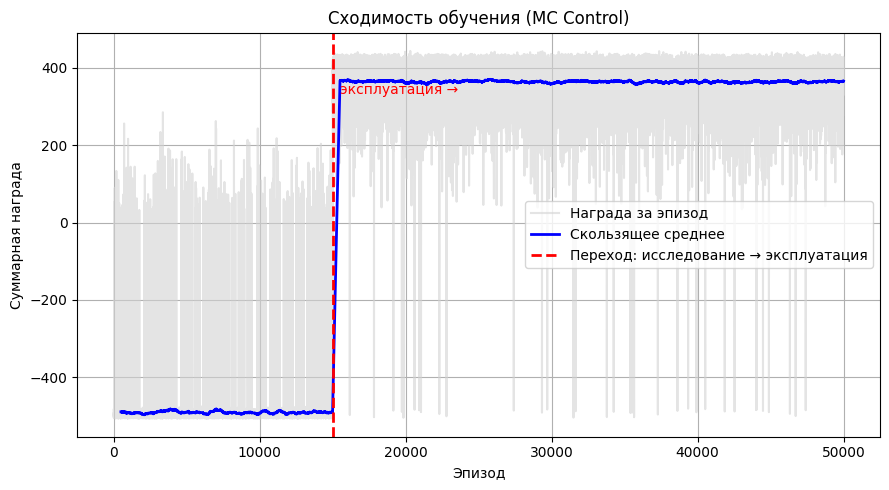

In [196]:
plot_training_progress(rewards, n_explore)

In [197]:
evaluate_policy(env, policy, bins)

Успешных эпизодов: 100/100 (100.00%)


In [200]:
video_dir = 'Sep_policy'
video_name = 'Sep_run'
Sep_files = record_game_video(env, video_dir, video_name, Q=Q, mode='q_policy')

In [201]:
show_video(Sep_files[0])

Агент выучил довольно эффективную стратегию, выполнив задание значительно быстрее первого. Так же заметно, как резко меняется график обучения при переходе в режим эксплуатации, когда рандомное исследование приносило минимально возможную награду, а за тем максимальный результат сразу при переключении в режим эксплуатации.

## Q-графики раздельного режима обучения

In [202]:
plot_Q_surface_per_action_real_angles(Q, bins)

In [203]:
plot_policy_heatmap(Q)

Графики довольно сложно описать при отрисовке дискретной стратегии на непрерывном пространстве, однако можно заметить, что во втором случае имеется яма ценности на всех трех графиках выбора действий в нулевой области основного маятника, т.е. в положении вертикально вниз. Это может свидетельствовать о том, что агент использует остальное пространство для более быстрого накопления скоростей вторичного маятника и эффективной максимизации награды эпизода.

# Итог

Мы обучили агента по методу Монте-Карло с использованием эпсилон функции.

В первом случае эпсилон функция была реализована жадно, хоть и с линейным убыванием при обучении агента. Данное действие имеет цель создать начальные условия для развития обучения, чтобы агент не сидел долгое время в минимумах наград, а немного исследовал окружение. Далее функция постепенно снижается, позвляя более точно настроить Q-функцию агента.

Второй случай использовал раздельную политику, когда агент 30% начального времени просто исследовал окружиене, совершая случайные действия и запоминая результаты, а после переключился в режим эксплуатации, которая быстро позволила выполнить задачу данной игры - достигнуть определенной высоты вторичным маятником.

Сравнивая подходы можно заметить, как первый агент выстраивает свою функцию постепенно, что видно на графике обучения. А второй сначала не смотрит на награды, отдавая предпочтение изучению, а за тем максимизирует награду сразу же после переключения.

Ниже прикреплен архив для демонстрации.

In [205]:
import shutil, zipfile
def copy_files_and_zip(file_list, target_folder, zip_name):
    """Копирует несколько файлов и создает архив"""

    # Создаем папку
    os.makedirs(target_folder, exist_ok=True)

    # Копируем все файлы
    for source_file in file_list:
        if os.path.exists(source_file):
            file_name = os.path.basename(source_file)
            destination = os.path.join(target_folder, file_name)
            shutil.copy2(source_file, destination)
            print(f"Скопирован: {file_name}")
        else:
            print(f"Файл не найден: {source_file}")

    # Создаем архив
    zip_filename = f"{zip_name}.zip"
    with zipfile.ZipFile(zip_filename, 'w', zipfile.ZIP_DEFLATED) as zipf:
        for root, dirs, files in os.walk(target_folder):
            for file in files:
                file_path = os.path.join(root, file)
                arcname = os.path.relpath(file_path, os.path.dirname(target_folder))
                zipf.write(file_path, arcname)

    print(f"Архив создан: {zip_filename}")
    return zip_filename

In [206]:
target_folder = '/content/MC_agents'
files_to_zip = ['./random_test/test_run-episode-0.mp4', './Q_eval/Q_run-episode-0.mp4', './Sep_policy/Sep_run-episode-0.mp4']

result_zip = copy_files_and_zip(files_to_zip, target_folder, "Acrobot_agents")

Скопирован: test_run-episode-0.mp4
Скопирован: Q_run-episode-0.mp4
Скопирован: Sep_run-episode-0.mp4
Архив создан: Acrobot_agents.zip


In [ ]:
!wget https://storage.yandexcloud.net/quiz.pic/Acrobot_agents.zip